In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
#is a great way to get a quick count of null values in each column of a DataFrame.
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

#1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [5]:
#Rmove extra empyt rows
#In this code:
#- axis=1 specifies that we're working with columns
#- axis=0 specifies that we're working with rows
#- how='all' means that only columns or rows with all missing values (i.e., empty columns or rows) will be removed

#- axis=1 என்பது நெடுவரிசைகளுடன் நாங்கள் வேலை செய்கிறோம் என்பதைக் குறிப்பிடுகிறது
#- axis=0 என்பது நாம் வரிசைகளுடன் வேலை செய்கிறோம் என்பதைக் குறிப்பிடுகிறது
#- எப்படி='அனைத்து' என்றால், அனைத்து விடுபட்ட மதிப்புகள் 
#(அதாவது வெற்று நெடுவரிசைகள் அல்லது வரிசைகள்) கொண்ட நெடுவரிசைகள் அல்லது வரிசைகள் மட்டுமே அகற்றப்படும்.

dataset=dataset.dropna(axis=0, how='all').dropna(axis=1, how='all')
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#df: the original DataFrame
#df: அசல் DataFrame
#fillna(): the method to replace NaN values
#fillna(): NaN மதிப்புகளை மாற்றுவதற்கான முறை
#inplace=True, you're telling pandas to modify the original DataFrame df directly, rather than returning a new DataFrame with the replaced values.
#inplace=True ஐ அமைப்பதன் மூலம், மாற்றப்பட்ட மதிப்புகளுடன் புதிய DataFrame ஐத் திருப்பித் தராமல், அசல் DataFrame df ஐ நேரடியாக மாற்றுமாறு பாண்டாக்களிடம் கூறுகிறீர்கள்.
dataset["salary"].fillna(0,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1808\3941721443.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

2)How many of them are not placed?

In [8]:
#Count the number of rows where "status" is not "Placed"
Not_Placed_df=(dataset['status']=='Not Placed').sum()
print(Not_Placed_df)

67


#3)Find the reason for non placement from the dataset?

In [9]:
Non_Placed=dataset[dataset['status']=='Not Placed']
average_mark_Non_Placed=Non_Placed[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].mean()
average_mark_Non_Placed.mean()

np.float64(61.65489552238805)

In [10]:
Placed=dataset[dataset['status']=='Placed']
average_mark_Placed=Placed[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].mean()
average_mark_Placed.mean()

np.float64(69.24120270270271)

#4)What kind of relation between salary and mba_p

In [29]:
#dataset.corr(numeric_only=True)

In [30]:
dataset['mba_p'].corr(dataset['salary'])

np.float64(0.13982273892615557)

#5)Which specialization is getting minimum salary?

In [13]:
mini_salaries=dataset.groupby('specialisation')['salary'].mean()
print(mini_salaries)

specialisation
Mkt&Fin    236591.666667
Mkt&HR     150842.105263
Name: salary, dtype: float64


Minimum Salary for Mkt&HR

 #6)How many of them getting above 500000 salary?

In [14]:
threshold=500000
count_abuve_threshold=(dataset['salary']>threshold).sum()
print(count_abuve_threshold)
threshold

High_salaries=dataset[dataset['salary']>500000]

gender_list=High_salaries['gender'].tolist()
print(gender_list)

3
['M', 'M', 'F']


#7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [15]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=np.float64(98.64487057324706), pvalue=np.float64(4.672547689133573e-21))

In [16]:
#Reject null hypothesis p<0.05
#accept null hypothesis and reject alternate hypothesis 

 #8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make
decision using Hypothesis Testing)


In [17]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Sci_Tech = dataset[dataset['degree_t']=='Sci&Tech']['salary']
Mkt_HR = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(Sci_Tech,Mkt_HR)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))

In [18]:
#Reject null hypothesis p<0.05
#accept alternate hypothesis 

#9)Convert the normal distribution to standard normal distribution for salary column

C:\Users\user\AppData\Local\Temp\ipykernel_1808\1787962733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["salary"])


<Axes: xlabel='salary', ylabel='Density'>

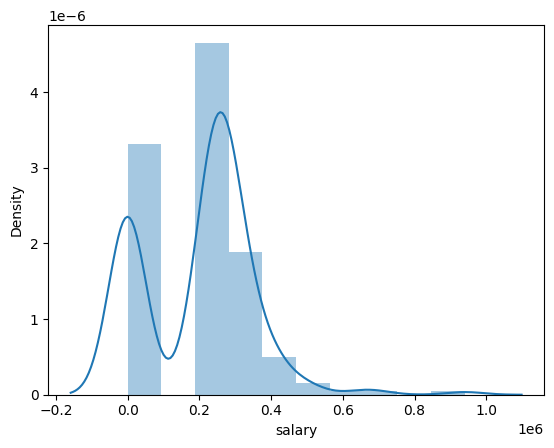

In [19]:
import seaborn as sns
sns.distplot(dataset["salary"])

In [20]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)    

C:\Users\user\AppData\Local\Temp\ipykernel_1808\1573502603.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


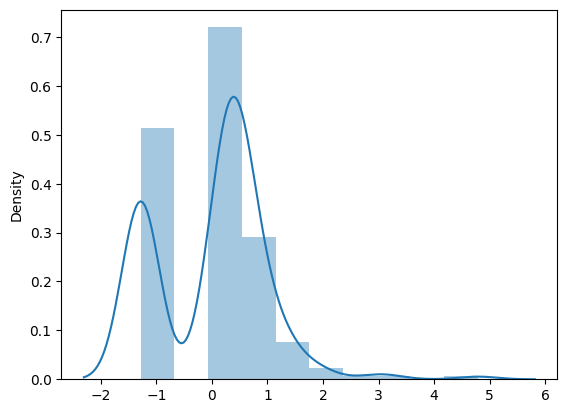

In [21]:
stdNBgraph(dataset['salary'])

#10)What is the probability Density Function of the salary range from 700,000 to 900,000

C:\Users\user\AppData\Local\Temp\ipykernel_1808\4201708349.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  probability_density = np.trapz(pdf_values, salary_range)


Probability density in the range 700000 to 900000: 0.6770293190228701


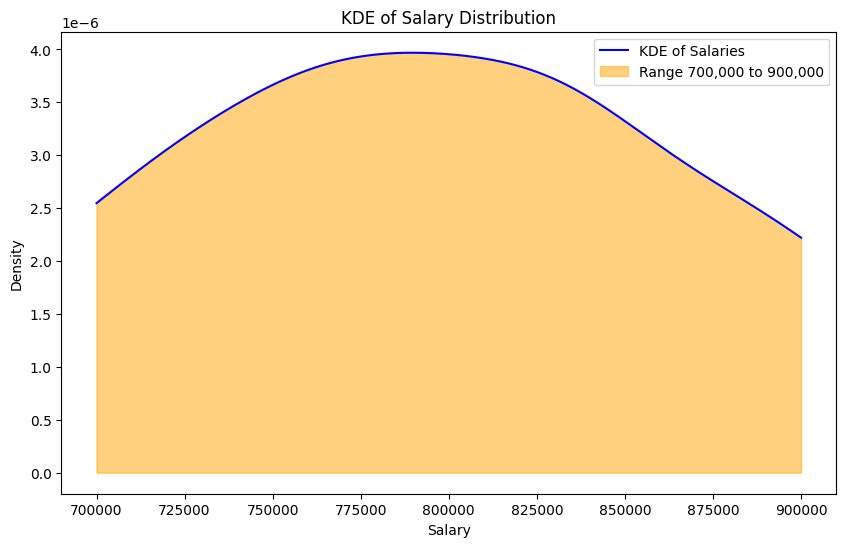

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Sample dataset: Replace this with your actual data
np.random.seed(0)  # For reproducibility
salaries = np.random.normal(loc=800000, scale=100000, size=1000)  # Mean=800,000, StdDev=100,000

# Create a DataFrame
data = pd.DataFrame({"salary": salaries})

# Create a KDE object
kde = gaussian_kde(data["salary"])

# Define the salary range of interest
low_bound = 700000
high_bound = 900000

# Create a range of salary values for evaluation
salary_range = np.linspace(low_bound, high_bound, 1000)

# Evaluate the PDF at these salary values
pdf_values = kde(salary_range)

# Integrate the PDF values to get the probability density
probability_density = np.trapz(pdf_values, salary_range)

print(f"Probability density in the range {low_bound} to {high_bound}: {probability_density}")

# Plot the KDE
plt.figure(figsize=(10, 6))
plt.plot(salary_range, pdf_values, label="KDE of Salaries", color="blue")
plt.fill_between(salary_range, pdf_values, where=(salary_range >= low_bound) & (salary_range <= high_bound), 
                 color="orange", alpha=0.5, label="Range 700,000 to 900,000")

plt.title('KDE of Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

 11)Test the similarity between the degree_t(Sci&Tech)with respect to
etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [23]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
SciTech_etest_p = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
SciTech_mba_p = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_ind(SciTech_etest_p,SciTech_mba_p)

TtestResult(statistic=np.float64(4.532000225151251), pvalue=np.float64(1.4289217003775636e-05), df=np.float64(116.0))

In [24]:
#Reject null hypothesis p<0.05
#accept null hypothesis and reject alternate hypothesis 

#12)Which parameter is highly correlated with salary?

In [26]:
slected_colums=['mba_p','ssc_p','hsc_p','degree_p','etest_p']

In [27]:
salary_correlation=dataset[slected_colums +['salary']].corr()['salary'].drop('salary')

In [28]:
salary_correlation

mba_p       0.139823
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
Name: salary, dtype: float64

In [25]:
#dataset['ssc_p'].corr(dataset['salary'])
#(0.538089713348551)